In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_data.csv to train_data.csv
User uploaded file "train_data.csv" with length 70821 bytes


In [5]:
df = pd.read_csv('train_data.csv')
df.head()

,a_fullVisitorId,a_hits_customDimensions_value,a_COUNT,a_SUM_totals_pageviews,a_SUM_totals_hits,a_SUM_totals_timeOnSite,a_SUM_hits_hitNumber,a_diffdays_latest,a_diffdays_oldest,a_desktop_flag,...,a_OS_Macintosh_flag,a_SUM_morning_visit,a_SUM_daytime_visit,a_SUM_evening_visit,a_SUM_midnight_visit,a_page201404,a_page201405,a_page201406,b_hits_customDimensions_value,b_CV_flag
0,1,1,4,5,10,34,4,24,27,1,...,0,0,1,0,3,0,0,0,1,0
1,2,2,1,1,2,1,1,24,24,1,...,0,0,0,1,0,0,0,0,2,0
2,3,3,1,1,2,1,1,24,24,1,...,0,1,0,0,0,0,0,0,3,0
3,4,4,3,4,8,97,5,11,42,1,...,0,0,0,0,3,0,0,0,4,0
4,5,5,1,1,2,2,1,24,24,1,...,0,0,1,0,0,0,0,0,5,0


In [6]:
df.shape

(1295, 23)

In [0]:
df = df.drop(['a_fullVisitorId', 'a_hits_customDimensions_value'], axis=1)

In [15]:
dataset = df.values
len(dataset)

1295

In [20]:
X = dataset[:,0:19]
Y = dataset[:,20]
X

array([[ 4,  5, 10, ...,  0,  0,  0],
       [ 1,  1,  2, ...,  0,  0,  0],
       [ 1,  1,  2, ...,  0,  0,  0],
       ...,
       [ 1,  1,  2, ...,  0,  0,  0],
       [ 1,  1,  2, ...,  0,  0,  0],
       [ 1,  1,  2, ...,  0,  0,  0]])

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:1,:])


[[ 2.114  0.268  0.486 -0.063  0.58   0.069  0.242  0.164 -0.115 -0.115
   0.267 -0.215 -0.378  0.369 -0.471  7.038 -0.191 -0.122 -0.074]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.33, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV()
lr.fit(trainX, trainY)
pred_y = lr.predict(testX)
print("Test fraction correct (LR-Accuracy) = {:.2f}".format(lr.score(testX, testY)))

Test fraction correct (LR-Accuracy) = 0.88


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testY, pred_y)
print(confusion_matrix)

[[363   5]
 [ 46  14]]


## Deep Learning

In [32]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
trainY = pd.get_dummies(trainY).values
testY = pd.get_dummies(testY).values

In [0]:
model = Sequential()
model.add(Dense(16, input_shape=(19,)))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [41]:
model.fit(trainX, trainY, verbose=1, batch_size=1)
score, accuracy = model.evaluate(testX, testY, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Epoch 1/1
867/867 [==============================] - 1s 1ms/step - loss: 0.3728 - acc: 0.8478
Test fraction correct (NN-Score) = 0.35
Test fraction correct (NN-Accuracy) = 0.87


In [0]:
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras import optimizers

model = Sequential()
model.add(Dense(16,
                input_shape=(19,), 
                activation="relu",
                kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))



model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=optimizers.RMSprop(lr=0.001))

In [0]:
history = model.fit(trainX, trainY, verbose=0, batch_size=1, epochs=40, validation_data=(testX, testY))

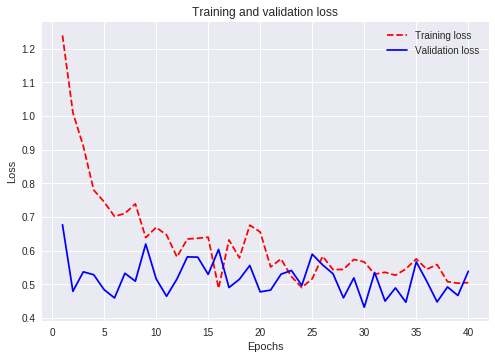

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

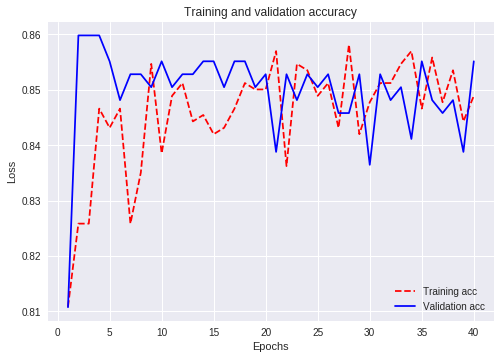

In [61]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [62]:
score, accuracy = model.evaluate(testX, testY, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test fraction correct (NN-Score) = 0.54
Test fraction correct (NN-Accuracy) = 0.86


In [67]:
pred_y = model.predict(testX)
np.round(pred_y, 2)

array([[1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.83, 0.17],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.65, 0.35],
       [1.  , 0.  ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.29, 0.71],
       [0.77, 0.23],
       [0.83, 0.17],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.82, 0.18],
       [0.35, 0.65],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.51, 0.49],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.9 , 0.1 ],
       [1.  , 0.  ],
       [0.29, 0.71],
       [0.76, 0.24],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.27, 0.73],
       [0.87,

In [64]:
y_test_class = np.argmax(testY,axis=1)
y_pred_class = np.argmax(pred_y,axis=1)

print(y_test_class)
print(y_pred_class)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0

In [65]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       0.89      0.95      0.92       368
          1       0.47      0.28      0.35        60

avg / total       0.83      0.86      0.84       428

[[349  19]
 [ 43  17]]


In [0]:
cm = confusion_matrix(y_test_class,y_pred_class)

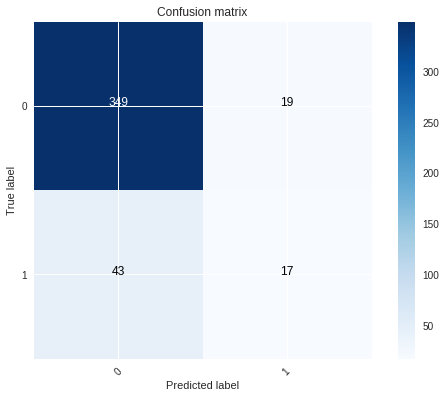

In [71]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
   
import itertools
class_names=np.array(['0','1'])
plot_confusion_matrix(cm,class_names)